In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from lib.util_ml_helpers import *

# set up plotting theme and configurations
plt.style.use('ggplot')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [3]:
# data snapshot
cancer_df = pd.read_csv('./data/cervical.csv')
cancer_df.head(5)

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Biopsy
0,18,4,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
1,15,1,14,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
2,34,1,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
3,52,5,16,4,1,37.0,1,3.0,0,0.0,0,0,0,1,1,Healthy
4,46,3,21,4,0,0.0,1,15.0,0,0.0,0,0,0,1,1,Healthy


In [4]:
# update column name
cancer_df.columns = ['age','num_of_sex_partners','first_sex','num_of_pregn'\
    ,'smokes','smokes_yrs','hormonal_contrpt','hormonal_contrpt_yrs','iud'\
    ,'iud_yrs','stds','stds_num','stds_num_diagn','stds_time_since_1diagn'\
    ,'stds_time_since_ldiagn','biopsy']
cancer_df.reset_index(drop=False, inplace=True)
cancer_df.rename(columns={"index":"rowID"},inplace=True)

In [5]:
# data ditionary
# get a sense of our data
dict_df = generate_dict(cancer_df)
dict_df

,n_of_nulls,row_counts,unique_values,dtypes,min_value,mean,max_value,std,25%,50%,75%,unique_items
rowID,0,858,858,int64,0.0,428.500000,857.0,247.827561,214.25,428.50,642.75,NaN
age,0,858,44,int64,13.0,26.820513,84.0,8.497948,20.00,25.00,32.00,NaN
num_of_sex_partners,0,858,12,int64,1.0,2.511655,28.0,1.644759,2.00,2.00,3.00,NaN
first_sex,0,858,21,int64,10.0,16.979021,32.0,2.797653,15.00,17.00,18.00,NaN
num_of_pregn,0,858,11,int64,0.0,2.192308,11.0,1.434395,1.00,2.00,3.00,NaN
smokes,0,858,2,int64,0.0,0.143357,1.0,0.350641,0.00,0.00,0.00,NaN
smokes_yrs,0,858,30,float64,0.0,1.201241,37.0,4.060623,0.00,0.00,0.00,NaN
hormonal_contrpt,0,858,2,int64,0.0,0.686480,1.0,0.464194,0.00,1.00,1.00,NaN
hormonal_contrpt_yrs,0,858,40,float64,0.0,1.972394,30.0,3.597888,0.00,0.25,2.00,NaN
iud,0,858,2,int64,0.0,0.096737,1.0,0.295771,0.00,0.00,0.00,NaN


In [6]:
# response distribution
# it shows that it's a highly imbalanced data set
resp_dist = cancer_df.groupby("biopsy").agg({'rowID':len}).reset_index(drop=False)
resp_dist['pct'] = resp_dist['rowID'] / resp_dist['rowID'].sum()
print(resp_dist)

    biopsy  rowID       pct
0   Cancer     55  0.064103
1  Healthy    803  0.935897


</h3><b>EDA starts here</b></h3>

In [7]:
# organise our columns into different category
cols_cat = {
    'num':['age','first_sex','smokes_yrs','hormonal_contrpt_yrs','iud_yrs','stds_time_since_1diagn','stds_time_since_ldiagn']\
    ,'ordinal':['smokes','num_of_sex_partners','num_of_pregn','hormonal_contrpt','iud','stds','stds_num','stds_num_diagn']\
    ,'cat':[]
    ,'resp':['biopsy']
}
for item in cols_cat.get('ordinal'):
    print("Column " + item + " having the following values: " + ",".join([str(e) for e in cancer_df[item].sort_values().unique()]))

Column smokes having the following values: 0,1
Column num_of_sex_partners having the following values: 1,2,3,4,5,6,7,8,9,10,15,28
Column num_of_pregn having the following values: 0,1,2,3,4,5,6,7,8,10,11
Column hormonal_contrpt having the following values: 0,1
Column iud having the following values: 0,1
Column stds having the following values: 0,1
Column stds_num having the following values: 0,1,2,3,4
Column stds_num_diagn having the following values: 0,1,2,3


<h5>Imbalanced data</h5>
<p>We have 6% of observations having cancer while the rest are not. The distribution tells us that it's an imbalanced data.</p>

In [8]:
# find ordinal variables that are significant to response
feature_ord_cols = list()
for item in cols_cat.get('ordinal'):
    if chisquare_test(cancer_df, item, "biopsy", significant_flag=True):
        feature_ord_cols.append(item)
    else:
        print(item + " is not significant")
print("ordinal columns that are significant to response: " + ",".join(feature_ord_cols))

smokes is not significant
num_of_sex_partners is not significant
num_of_pregn is not significant
hormonal_contrpt is not significant
iud is not significant
ordinal columns that are significant to response: stds,stds_num,stds_num_diagn


In [9]:
from scipy.stats import ttest_ind
# find numerical variables that are significant to response
def t_test(df, col_x, col_y, thres=0.05, significant_flag=True, **kwargs):
    """ the function is to test the col_x on col_y whether there is any statistical different on col_x for the two populations. Can only be used between numerical variables col_x on categorical col_y
    :Args:
        - df, dataframe
        - col_x, str, the column we want to prove that has no significance to col_y
        - col_y, str, response column
        - thres, float, the confidence interval
        - significant_flag, bool, do we want to return decision of statistical significance or not
        - **kwargs, any parameters used by scipy.stats.ttest_ind
    :Returns:
        - bool, can we reject our null hypothesis that col_x has no impact on col_y
    """
    
    assert df[col_y].nunique() == 2, f'{col_y} has more than 2 unique values'
    try:
        uni_y = df[col_y].unique()
        t_stats, p = ttest_ind(df[df[col_y] == uni_y[0]][col_x].to_numpy()\
            , df[df[col_y] == uni_y[1]][col_x].to_numpy(), **kwargs)
        # if significant_flag is true, just return bool else return p-value
        if significant_flag:
            return True if p <= thres else False
        else:
            return p
    except Exception as e:
        print(e)

feature_num_cols = list()
for item in cols_cat.get('num'):
    if t_test(cancer_df, item, "biopsy", thres=0.05, significant_flag=True, equal_var=True):
        feature_num_cols.append(item)
    else:
        print(item + " is not significant")
    # print(item + " p-value is " + str(t_test(cancer_df, item, "biopsy", significant_flag=False)))
print("numerical columns that are significant to response: " + ",".join(feature_num_cols))
    

age is not significant
first_sex is not significant
smokes_yrs is not significant
iud_yrs is not significant
stds_time_since_1diagn is not significant
stds_time_since_ldiagn is not significant
numerical columns that are significant to response: hormonal_contrpt_yrs


In [10]:
# combine features
# and make response as ordinal variable
feature_cols = feature_num_cols + feature_ord_cols
cancer_df['resp'] = cancer_df['biopsy'].apply(lambda x: 0 if x == "Healthy" else 1)

<h3>Modelling</h3>
<p>We want to experiment Logistic Regression as the baseline, Boost Tree (Goss). Comparing to random forest will lead us to a better model for this problem.</p>
<p><b>consideration 1: </b>based on previous EDA piece, we found that features are not really normally distributed. Hence Naive Bayes wouldn't be a good algorithm for us. </p>
<p><b>consideration 2: </b>given that labels' distribution is imbalanced, we need to adjust class weights. <u>We want to penalise the misclassification made by minority class by setting a higher class weight and reducing weight for the majority class</u>
    <ul>
        <li><a href="https://towardsdatascience.com/class-weights-for-categorical-loss-1a4c79818c2d">Reference 1 - class weights derivative</a></li>
        <li><a href="https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b">Reference 2 - class weights grid search</a></li>
        <li><a href="https://web.stanford.edu/~jurafsky/slp3/5.pdf">Reference 3 - logistic regression</a></li>
    </ul>
</p>
<p><b>consideration 3: </b>LogisticRegression prefer normalised data when apply gradient descent.</p>

In [11]:
import math
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, mean_absolute_error, f1_score, recall_score, precision_score, confusion_matrix, accuracy_score,roc_auc_score, roc_curve

In [12]:
# train and test split
split_state = 25
X_train, X_test, y_train, y_test = train_test_split(cancer_df[feature_cols].to_numpy(), cancer_df['resp'].to_numpy(), random_state=split_state, test_size=0.2)
print(f"""details of data:
holdout group size {len(X_test)}, {np.round(len(X_test)/len(cancer_df),2) * 100}% 
and train/test group size {len(X_train)}, {np.round(len(X_train)/len(cancer_df),2) * 100}%
""")

details of data:
holdout group size 172, 20.0% 
and train/test group size 686, 80.0%



In [13]:
# given it's an imbalanced dataset, we set up class weight
#
minority_rec = 55
majority_rec = 803
total_rec = minority_rec + majority_rec
adj_class_weight = {1:0.5 * total_rec / minority_rec , 0:0.5 * total_rec / majority_rec}
print(adj_class_weight)

{1: 7.8, 0: 0.5342465753424658}


<h5>Logistic Regression Training</h5>
<p>We will include</p>
<ul>
    <li>Grid Search Cross Validation on best parameters for class weight and L2 regularisation</li>
    <li>Calculate Feature Importance for Logistic Regression</li>
</ul>

In [14]:
# train model - logistic regression
# how to use make scorer, https://scikit-learn.org/stable/modules/model_evaluation.html
custom_scoring = make_scorer(f1_score, greater_is_better=True)
logistic_params = {
    "class_weight":[{1:15,0:1}, adj_class_weight, {1:7,0:1}, {1:3,0:1}]\
    , 'C':[0.001, 0.01, 0.1, 1]
}
grid_logistic_reg = GridSearchCV(
    estimator = LogisticRegression(random_state=25
        , solver='liblinear'
        , max_iter=2000
        , tol=1e-5
        , fit_intercept=1) # define our algorithm
    , param_grid = logistic_params  # define the metrics for searching
    , scoring = custom_scoring   # define the evaluation metrics
    , verbose=0
)
grid_logistic_reg.fit(X_train, y_train)
logistic_reg = grid_logistic_reg.best_estimator_
# export parameters
print('model parameters')
for k,v in logistic_reg.get_params().items():
    print(f"{k}:{v}")
print('evaluation')
print("training, " + str(calc_metrics(logistic_reg, X_train, y_train)))
print("testing, " + str(calc_metrics(logistic_reg, X_test, y_test)))

model parameters
C:1
class_weight:{1: 7, 0: 1}
dual:False
fit_intercept:1
intercept_scaling:1
l1_ratio:None
max_iter:2000
multi_class:auto
n_jobs:None
penalty:l2
random_state:25
solver:liblinear
tol:1e-05
verbose:0
warm_start:False
evaluation
training, {'accuracy': 0.8731778425655977, 'precision': 0.22077922077922077, 'recall': 0.38636363636363635, 'f1_score': 0.2809917355371901}
testing, {'accuracy': 0.8604651162790697, 'precision': 0.11764705882352941, 'recall': 0.18181818181818182, 'f1_score': 0.14285714285714285}


<h5>Intepretation of logistic regresion coefficient</h5>
<p><b>Odd ratio - </b>Odds is the ratio between P(Y=1) and P(Y=0), and it represents the relativity between the two probability. When it is 1, it means it's equal chances, vice verse.</p>
<p><b>Feature importance - </b>when a feature X increases by 1 unit, the odd ratio of (X+1) against the odd ratio is exp(coef). Hence, we can use exp(coef) as our feature importance, since the bigger the number is, the more it times to the odd ratio under the same increase. Anything above 1 is positive factors and below 1 would be negative factors</p>

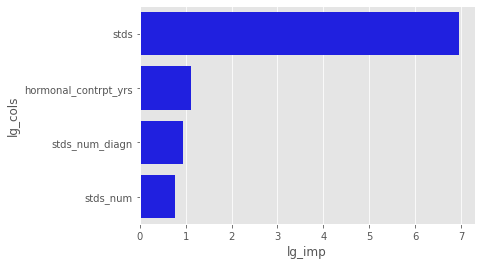

In [15]:
# export feature importance
#
feature_importance = pd.DataFrame(pd.Series(logistic_reg.coef_.reshape(-1),name='lg_coef'))
feature_importance['lg_imp'] = feature_importance.lg_coef.apply(lambda x: math.pow(math.e, x))
feature_importance['lg_cols'] = feature_cols
sns.barplot(x="lg_imp", y="lg_cols", data=feature_importance\
    .sort_values(by='lg_imp',ascending=False), color="b")

<h5>Boost Tree Training</h5>
<p>We will include</p>
<ul>
    <li>Grid Search Cross Validation on best parameters for class weight and L2 regularisation</li>
    <li>Calculate Feature Importance</li>
</ul>
<p>References</p>
<ul>
<li><a href="https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier.fit">LightGBM Classifier Document</a></li>
<li><a href="https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html">LightGBM Parameter Tuning</a></li>
<li><a href='https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python/notebook'>Fine tuning LightGBM and dealing with Overfitting</a></li>
</ul>

In [16]:
from lib.util_focal_loss import *
from lightgbm import LGBMClassifier, plot_importance,plot_metric
from lightgbm import train, early_stopping
from lightgbm import Dataset
from sklearn import metrics

def logloss_init_score(y):
    p = y.mean()
    p = np.clip(p, 1e-15, 1 - 1e-15)  # never hurts
    log_odds = np.log(p / (1 - p))
    return log_odds

X_fit, X_val, y_fit, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=25)
fit = Dataset(
    X_fit, y_fit,
    init_score=np.full_like(y_fit, logloss_init_score(y_fit), dtype=float)
)
val = Dataset(
    X_val, y_val,
    init_score=np.full_like(y_val, logloss_init_score(y_fit), dtype=float),
    reference=fit
)

In [26]:
# initial focal loss
fl = FocalLoss(alpha=None, gamma=0)

gbt_model = LGBMClassifier(
    boosting_type='goss',
    objective = fl.lgb_obj,
    n_estimators=10000,
    learning_rate = 0.01
)

gbt_model.fit(X = X_fit, y = y_fit\
    , feature_name = feature_cols\
    , eval_set=[(X_fit,y_fit),(X_val,y_val)]\
    , eval_names=['fit','val']\
    , eval_metric=fl.lgb_eval\
    , callbacks=[early_stopping(stopping_rounds=20)])

AttributeError: 'numpy.ndarray' object has no attribute 'get_label'

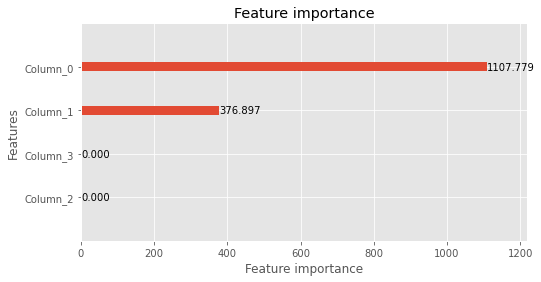

In [18]:
# plot feature importance
plot_importance(gbt_reg, importance_type='gain', max_num_features=-1, ignore_zero=False, figsize=(8,4))

<h3>Compare results / Evaluation</h3>
<p>Here're the content</p>
<ul>
    <li>Find the correlation between log loss of FP/FN and each feature per model. The aim is to find the which factor influnce our errors the most</li>
    <li>Plotting ROC-AUC curves of the two models. It shows that Gradient Boost Tree does provide a better performance.</li>
</ul>

In [19]:
# we need to understand which one predicts wrongly
# 
import math
log_loss = lambda y,p: (-1) * y * math.log(p) + (1 - y) * math.log(1 - p)
outcome_df = pd.DataFrame(
    np.hstack([
        X_train
        , y_train.reshape(-1,1)
        , logistic_reg.predict(X_train).reshape(-1,1)
        , logistic_reg.predict_proba(X_train).reshape(-1,2)
        , gbt_reg.predict(X_train).reshape(-1,1)
        , gbt_reg.predict_proba(X_train).reshape(-1,2)
    ]), columns = feature_cols + ['resp','lg_pred','lg_prob0','lg_prob1','gbt_pred','gbt_prob0','gbt_prob1'])
outcome_df['lg_prob_odd'] = outcome_df['lg_prob1'].apply(lambda x: math.log(x / (1-x)))
outcome_df['lg_diagnosis'] = outcome_df.apply(lambda x: 'True Neg' if (x.resp==x.lg_pred) & (x.resp==0)  else 'True Pos' if (x.resp==x.lg_pred) & (x.resp==1) else 'False Pos' if x.resp == 0 else 'False Neg', axis=1)
outcome_df['lg_loss'] = outcome_df.apply(lambda x: log_loss(x.resp, x.lg_prob1), axis=1) 
outcome_df['gbt_diagnosis'] = outcome_df.apply(lambda x: 'True Neg' if (x.resp==x.gbt_pred) & (x.resp==0)  else 'True Pos' if (x.resp==x.gbt_pred) & (x.resp==1) else 'False Pos' if x.resp == 0 else 'False Neg', axis=1)
outcome_df['gbt_loss'] = outcome_df.apply(lambda x: log_loss(x.resp, x.gbt_prob1), axis=1) 

AttributeError: 'Booster' object has no attribute 'predict_proba'

model lg
False Positive


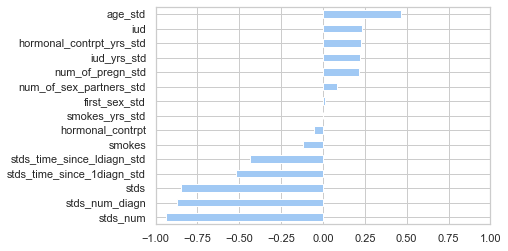

False Negative


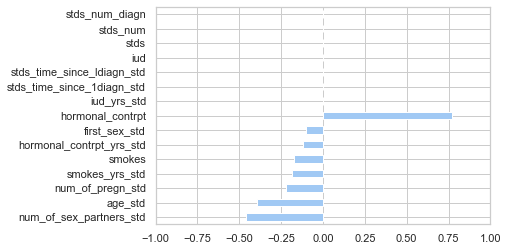

model gbt
False Positive


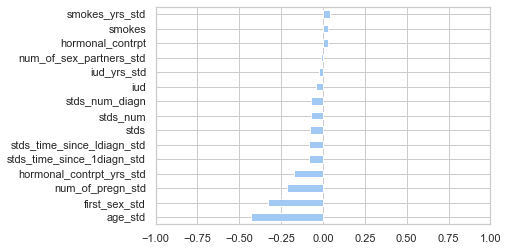

False Negative


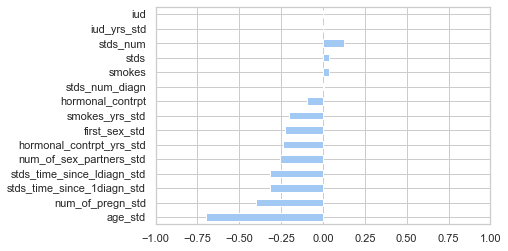

In [35]:
# with log loss each instance, we can find the correlation against our inputs and find correlation between log-loss and our inputs
for m in ['lg','gbt']:
    print(f'model {m}')
    print('False Positive')
    outcome_df.loc[outcome_df[f'{m}_diagnosis']=="False Pos"][feature_cols]\
        .corrwith(other=outcome_df[outcome_df[f'{m}_diagnosis']=="False Pos"][f'{m}_loss'], axis=0, method='pearson')\
        .sort_values().plot(kind='barh', xlim=(-1,1))
    plt.show()

    print('False Negative')
    outcome_df.loc[outcome_df[f'{m}_diagnosis']=="False Neg"][feature_cols]\
        .corrwith(other=outcome_df[outcome_df[f'{m}_diagnosis']=="False Neg"][f'{m}_loss'], axis=0, method='pearson')\
        .sort_values().plot(kind='barh', xlim=(-1,1))
    plt.show()

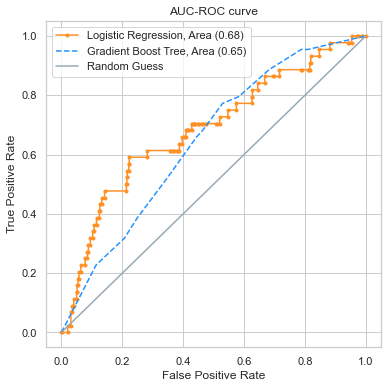

In [36]:
# plotting AUC ROC curve
lg_fpr, lg_tpr, lg_thresholds = roc_curve(outcome_df['resp'].to_numpy(), outcome_df['lg_prob1'], pos_label=1)
lg_roc_auc_score = roc_auc_score(outcome_df['resp'].to_numpy(), outcome_df['lg_prob1'])
gbt_fpr, gbt_tpr, gbt_thresholds = roc_curve(outcome_df['resp'].to_numpy(), outcome_df['gbt_prob1'], pos_label=1)
gbt_roc_auc_score = roc_auc_score(outcome_df['resp'].to_numpy(), outcome_df['gbt_prob1'])
f, ax = plt.subplots(figsize=(6,6))
ax.plot(lg_fpr, lg_tpr, '.-', color="#ff9124", label=f'Logistic Regression, Area ({np.round(lg_roc_auc_score,2)})')
ax.plot(gbt_fpr, gbt_tpr, '--', color="#2492ff", label=f'Gradient Boost Tree, Area ({np.round(gbt_roc_auc_score,2)})')
ax.plot(np.linspace(0,1,num=9), np.linspace(0,1,num=9), color='#96a9b5',label='Random Guess')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title('AUC-ROC curve')
ax.grid(True)
ax.legend(loc='best')
plt.show()

In [37]:
# export model
import pickle
filename = './model/cancer_logistic.sav'
pickle.dump(logistic_reg, open(filename,'wb'))

filename = './model/cancer_boost_tree.sav'
pickle.dump(gbt_reg, open(filename,'wb'))
